In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer

ruta='/content/drive/MyDrive/Ingeniería y Ciencia de Datos/Segundo Semestre/Ingeniería de Características/Colab Notebooks/'
df=pd.read_csv(ruta+'API_SI.POV.DDAY_DS2.csv',encoding='latin-1',sep='\t')


In [76]:
df.head(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualización de datos faltantes

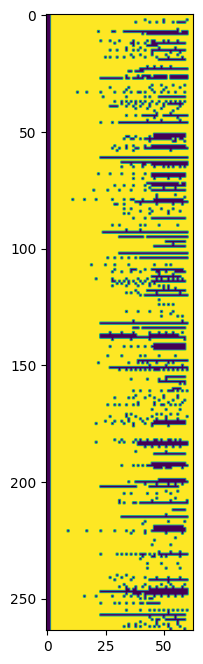

In [77]:
#Mapa de calor
dfNaN=df.isna() #True son los valores perdidos
plt.figure(figsize=(20,8))
plt.imshow(dfNaN) #Mapeo predeterminado -> Amarillo = NaN

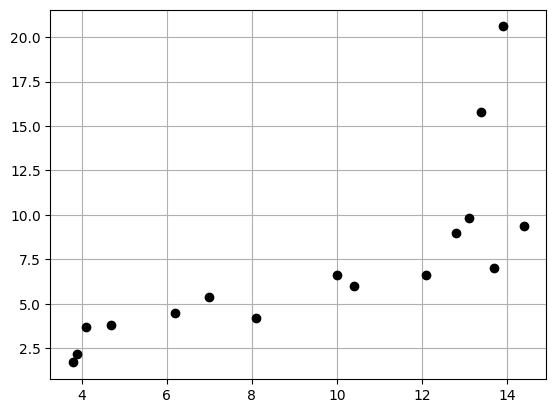

In [78]:
x=df[df['Country Code']=='LCN'].values[0]
y=df[df['Country Code']=='MEX'].values[0]
plt.plot(x[2:],y[2:],'ok')
plt.grid()

In [79]:
#Matriz de co-ocurrencia con las variables 'Latinoamérica' LCN y 'Mexico' MEX
df_str=df.fillna('NaN')
x=df_str[df['Country Code']=='LCN'].values[0]
y=df_str[df['Country Code']=='MEX'].values[0]
ct=pd.crosstab(x,y)
ct

col_0,1.7,2.2,3.7,3.8,4.2,4.5,5.4,6.0,6.6,7.0,9.0,9.4,9.8,15.8,20.6,MEX,Mexico,NaN
row_0,,,,,,,,,,,,,,,,,,
3.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [80]:
ct['NaN']

row_0
3.8                           1
3.9                           1
4.1                           0
4.3                           1
4.7                           0
5.7                           1
6.2                           0
6.7                           1
7.0                           0
7.5                           1
8.1                           0
10.0                          0
10.4                          0
11.2                          1
11.6                          1
12.1                          0
12.6                          2
12.8                          0
13.1                          0
13.4                          0
13.7                          3
13.8                          1
13.9                          0
14.2                          1
14.3                          1
14.4                          1
14.5                          1
15.2                          1
15.5                          1
16.8                          1
17.0                          1
LC

#Eliminación de datos

In [81]:
df.dropna() #Tenemos al menos un NaN en todas las variables

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


<Axes: >

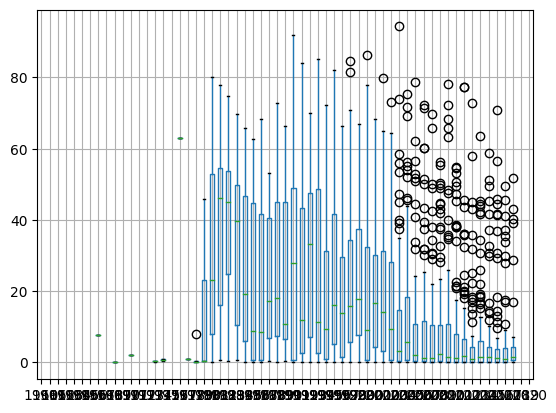

In [82]:
df.boxplot() #whis = 3 identifica datos extremos

In [83]:
#Elimina las filas (variables) donde no se tenga ningún valor
df.dropna(how='all')

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN


In [84]:
df.dropna(thresh=3) #Thresh indica el número mínimo de datos que debe haber para que no se elimine la fila

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN


In [85]:
df.dropna(axis=1,how='all') #Elimina los años donde no tengamos observaciones

,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,2.5,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.2,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.8,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN


In [86]:
np.random.seed(666)
df=pd.DataFrame(data=np.random.randn(100,4)+np.random.rand(4),columns=['A','B','C','D'])
nansA=[25,30,58,70,71]
nansB=np.random.randint(99,size=np.random.randint(20))
nansC=np.random.randint(99,size=np.random.randint(20))
df.loc[nansA,'A']=np.NaN
df.iloc[nansB,1]=np.NaN
df.loc[nansC,'C']=np.NaN
df.isna().sum()


A     5
B     7
C    18
D     0
dtype: int64

In [87]:
df.dropna(axis = 1, thresh = 83)

,A,B,D
0,0.859614,0.904098,1.733836
1,-0.536295,0.314635,-0.118973
2,0.675999,-0.362311,-0.106224
3,1.013648,-0.312786,0.364201
4,-1.053367,-0.151638,1.053973
...,...,...,...
95,0.798734,0.262438,1.346082
96,0.115081,0.899850,1.459219
97,-0.288264,0.213156,-0.573220
98,-1.393749,1.165839,0.634467


In [88]:
df.dropna(axis=1,thresh=83)

,A,B,D
0,0.859614,0.904098,1.733836
1,-0.536295,0.314635,-0.118973
2,0.675999,-0.362311,-0.106224
3,1.013648,-0.312786,0.364201
4,-1.053367,-0.151638,1.053973
...,...,...,...
95,0.798734,0.262438,1.346082
96,0.115081,0.899850,1.459219
97,-0.288264,0.213156,-0.573220
98,-1.393749,1.165839,0.634467


In [89]:
m=df.mean()
m

A   -0.049335
B    0.321315
C    0.161571
D    0.930127
dtype: float64

In [90]:
df_m=df.fillna(m)
df_m.loc[nansA,'A']

25   -0.049335
30   -0.049335
58   -0.049335
70   -0.049335
71   -0.049335
Name: A, dtype: float64

In [91]:
#La media artimética no se modifica
m-df_m.mean()

A    2.081668e-17
B    5.551115e-17
C   -2.775558e-17
D    0.000000e+00
dtype: float64

In [92]:
#La disperción se contrae
df.std()-df_m.std()

A    0.026434
B    0.036616
C    0.104361
D    0.000000
dtype: float64

#Sustitución por mediana

In [93]:
me=df.median()
me

A   -0.034494
B    0.222627
C    0.129817
D    0.954997
dtype: float64

In [94]:
df_me=df.fillna(me)
df_me.loc[nansA, 'A']

25   -0.034494
30   -0.034494
58   -0.034494
70   -0.034494
71   -0.034494
Name: A, dtype: float64

In [95]:
#La mediana no se modifica
me-df_me.median()

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

In [96]:
df.var()-df_me.var()

A    0.053926
B    0.072499
C    0.217130
D    0.000000
dtype: float64

#Sustitución por moda

In [97]:
mo=df.mode()
mo.iloc[0] #Escogemos el primero

A   -3.160084
B   -1.567961
C   -2.627232
D   -1.036191
Name: 0, dtype: float64

In [98]:
df_mo=df.fillna(mo.loc[0])
df_mo.loc[nansA,'A']

25   -3.160084
30   -3.160084
58   -3.160084
70   -3.160084
71   -3.160084
Name: A, dtype: float64

In [99]:
#La moda no se modifica
mo.loc[0]-df_mo.mode().loc[0]

A    0.0
B    0.0
C    0.0
D    0.0
Name: 0, dtype: float64

In [100]:
#En el caso de variables numéricas continuas, el sesgo se hace más negativo
df.skew()-df_mo.skew()

A    0.320971
B    0.164457
C    0.272642
D    0.000000
dtype: float64

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

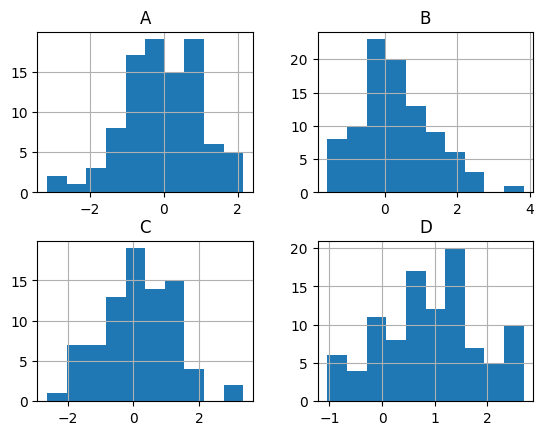

In [101]:
df.hist()

## Situación aleatoria

In [102]:
#Escogemos un vapr aleatorio de 'A' y lo sustituimos en todos los NaN
vaA = np.random.choice(df.A.dropna())
vaA

-0.28568798144065

In [103]:
df_random=df.copy()
df_random['A']=df.A.fillna(vaA)
df_random.loc[nansA,'A']

25   -0.285688
30   -0.285688
58   -0.285688
70   -0.285688
71   -0.285688
Name: A, dtype: float64

In [104]:
df_random=df.copy()
for var in df:
  val = np.random.choice(df[var].dropna())
  df_random[var]=df[var].fillna(val)
df_random.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

In [105]:
#Identificar dónde están los valores perdidos de 'A'
np.where(df.A.isna())

(array([25, 30, 58, 70, 71]),)

In [106]:
a,b=1,2

In [107]:
var_Anan,=np.where(df.A.isna())
var_Anan

array([25, 30, 58, 70, 71])

In [108]:
val_A=np.random.choice(df.A.dropna(),len(var_Anan))
val_A

array([-0.1086617 , -0.61946142,  0.82386892,  0.2300256 , -0.28568798])

In [109]:
df_random.loc[var_Anan,'A']=val_A
df_random.loc[nansA,'A']

25   -0.108662
30   -0.619461
58    0.823869
70    0.230026
71   -0.285688
Name: A, dtype: float64

In [110]:
df_random=df.copy()
for var in df:
  var_nan,=np.where(df[var].isna())
  val=np.random.choice(df[var].dropna(),len(var_nan))
  df_random.loc[var_nan,var]=val
df_random.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

### Usando clases

In [111]:
imp = SimpleImputer() #Sustitución por media
a_dfm=imp.fit_transform(df)
a_dfm.shape

(100, 4)

In [112]:
df_m=pd.DataFrame(a_dfm,columns=df.columns)
df_m.loc[nansA,'A'],m

(25   -0.049335
 30   -0.049335
 58   -0.049335
 70   -0.049335
 71   -0.049335
 Name: A, dtype: float64,
 A   -0.049335
 B    0.321315
 C    0.161571
 D    0.930127
 dtype: float64)

In [113]:
imp=SimpleImputer(strategy='median') # Sustitución por mediana. strategy='most_frequent' ->  pos la moda
a_dfme=imp.fit_transform(df)
df_me=pd.DataFrame(a_dfme,columns=df.columns)
df_me.loc[nansA,'A'],me

(25   -0.034494
 30   -0.034494
 58   -0.034494
 70   -0.034494
 71   -0.034494
 Name: A, dtype: float64,
 A   -0.034494
 B    0.222627
 C    0.129817
 D    0.954997
 dtype: float64)

In [114]:
imp_random=RandomSampleImputer()
df_random=imp_random.fit_transform(df)
df_random.head()  # Nos regresa un DataFrame

,A,B,C,D
0,0.859614,0.904098,1.306367,1.733836
1,-0.536295,0.314635,0.151928,-0.118973
2,0.675999,-0.362311,0.741769,-0.106224
3,1.013648,-0.312786,-0.165833,0.364201
4,-1.053367,-0.151638,-1.550001,1.053973


In [115]:
df_random.loc[nansA,'A']

25    0.241103
30    0.601691
58   -0.217671
70    0.286827
71    0.495507
Name: A, dtype: float64

In [125]:
# Sustituímos 'A' de forma aleatoria, 'B' con la media y 'C' con la mediana
imp_random=RandomSampleImputer(['A']) # objeto imputador para la sustitución aleatoria
d_val={'B':df['B'].mean(),
       'C':df['C'].median()}

In [124]:
df_copy=imp_random.fit_transform(df)
df_copy.isna().sum()

A     0
B     7
C    18
D     0
dtype: int64

In [126]:
df_copy=df_copy.fillna(d_val)
df_copy.loc[nansA,'A']

25   -0.834386
30    0.675999
58    0.601691
70    0.493137
71   -1.708676
Name: A, dtype: float64

In [120]:
df_copy.loc[nansB,'B'],m

(57    0.321315
 43    0.321315
 79    0.321315
 73    0.321315
 72    0.321315
 64    0.321315
 47    0.321315
 Name: B, dtype: float64,
 A   -0.049335
 B    0.321315
 C    0.161571
 D    0.930127
 dtype: float64)

In [127]:
df_copy.loc[nansC,'C'],me

(81    0.129817
 61    0.129817
 13    0.129817
 46    0.129817
 83    0.129817
 50    0.129817
 77    0.129817
 5     0.129817
 73    0.129817
 15    0.129817
 17    0.129817
 54    0.129817
 6     0.129817
 40    0.129817
 45    0.129817
 74    0.129817
 67    0.129817
 71    0.129817
 Name: C, dtype: float64,
 A   -0.034494
 B    0.222627
 C    0.129817
 D    0.954997
 dtype: float64)

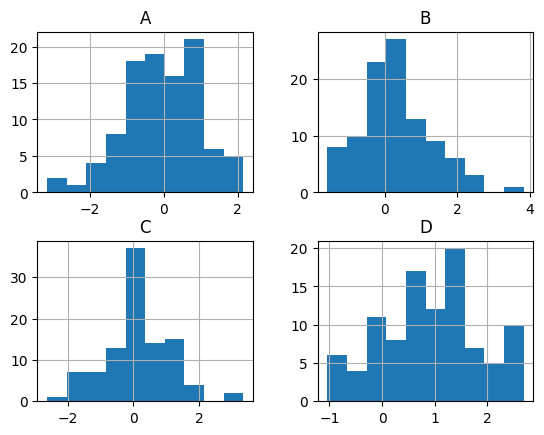

In [128]:
H=df_copy.hist()